<a href="https://colab.research.google.com/github/Sanvika25/implementing-SOFM-which-imitates-biological-neural-networks/blob/main/ann_week14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=c0f3f12567d5d4abdd2d35835d54415642abfe09b7e4ecd4dfd0407d0c34b590
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


<Figure size 1000x800 with 0 Axes>

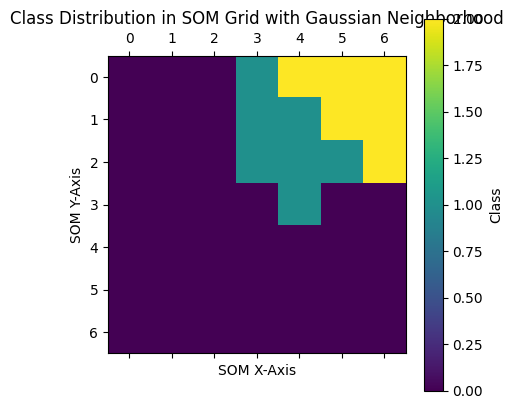

In [ ]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Initialize the SOM
grid_size = 7  # Adjust the grid size as needed
som = MiniSom(grid_size, grid_size, data.shape[1], sigma=1.0, learning_rate=0.5, neighborhood_function='gaussian', random_seed=1)

# Train the SOM
som.train_random(data, 500)

# Map data points to their closest neurons
win_map = som.win_map(data)

# Create a heatmap for class distribution on the SOM grid
class_distribution = np.zeros((grid_size, grid_size, 3), dtype=int)  # 3 classes

# Calculate class distribution
for i in range(data.shape[0]):
    bmu = som.winner(data[i])
    class_distribution[bmu[0], bmu[1], target[i]] += 1

# Create a heatmap plot
plt.figure(figsize=(10, 8))
cax = plt.matshow(class_distribution.argmax(axis=2), cmap='viridis')
plt.colorbar(cax, label='Class')

# Customize the plot
plt.title('Class Distribution in SOM Grid with Gaussian Neighborhood')
plt.xlabel('SOM X-Axis')
plt.ylabel('SOM Y-Axis')
plt.xticks(np.arange(grid_size), labels=range(grid_size))
plt.yticks(np.arange(grid_size), labels=range(grid_size))

# Show the plot
plt.show()
